# 🌿 Classificação com Naïve Bayes Gaussiano no Dataset Iris

## 📌 Sobre o Dataset Iris
O **Iris Dataset** é um dos mais conhecidos em Machine Learning. Ele contém medições de três espécies de flores do gênero *Iris* (**Setosa**, **Versicolor** e **Virginica**).  
As medições incluem:
- 📏 **Comprimento da sépala** (cm)  
- 📏 **Largura da sépala** (cm)  
- 🌿 **Comprimento da pétala** (cm)  
- 🌿 **Largura da pétala** (cm)  

O objetivo é prever a espécie de uma flor com base nessas características.  

---

## 🚀 O que o código faz?
Este código implementa um modelo **Naïve Bayes Gaussiano** para classificar flores do dataset **Iris**.  

🔹 **Carrega os dados do Iris Dataset**  
🔹 **Divide os dados em treino e teste** (80/20)  
🔹 **Treina um modelo Naïve Bayes Gaussiano** para classificação  
🔹 **Avalia o modelo** com métricas como acurácia, relatório de classificação e matriz de confusão  

---

## 🛠️ Como funciona o código?
O código está organizado em funções modulares para melhor organização e reutilização:

1️⃣ **`carregar_dataset()`** → Carrega e exibe as primeiras linhas do dataset  
2️⃣ **`dividir_dados(X, y)`** → Divide os dados em treino e teste  
3️⃣ **`treinar_naive_bayes(X_train, y_train)`** → Treina o modelo Naïve Bayes Gaussiano  
4️⃣ **`avaliar_modelo(modelo, X_test, y_test, target_names)`** → Avalia o desempenho do modelo  

---

## 📊 Avaliação do Modelo
Após o treinamento, o código exibe:  

✔ **Acurácia** do modelo  
✔ **Relatório de classificação** (Precisão, Recall, F1-Score)  
✔ **Matriz de confusão** visualizada com `seaborn`  

---

## 🔧 Requisitos
Antes de rodar o código, certifique-se de ter as bibliotecas instaladas:

```bash
pip install numpy pandas scikit-learn seaborn matplotlib


📌 Primeiras 5 linhas do dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   

✅ Acurácia do modelo: 1.00

📊 Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      

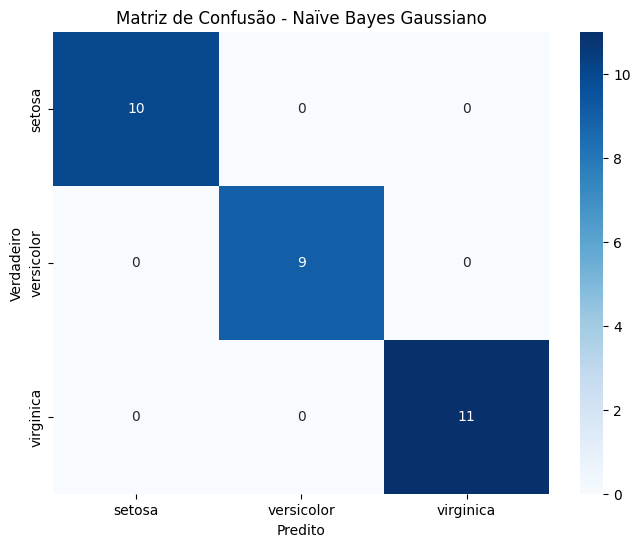

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Função para carregar e visualizar as primeiras linhas do dataset Iris
def carregar_dataset():
    iris = load_iris()
    df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
    df_iris['target'] = iris.target
    print("📌 Primeiras 5 linhas do dataset Iris:")
    print(df_iris.head(), "\n")
    return iris, df_iris

# Função para dividir o dataset em treino e teste
def dividir_dados(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Função para treinar o modelo Naïve Bayes Gaussiano
def treinar_naive_bayes(X_train, y_train):
    modelo = GaussianNB()
    modelo.fit(X_train, y_train)
    return modelo

# Função para avaliar o modelo
def avaliar_modelo(modelo, X_test, y_test, target_names):
    y_pred = modelo.predict(X_test)
    
    # Exibindo métricas de avaliação
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Acurácia do modelo: {accuracy:.2f}\n")
    
    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - Naïve Bayes Gaussiano")
    plt.show()

# 🚀 Fluxo principal do código
if __name__ == "__main__":
    # Carregando o dataset
    iris, df_iris = carregar_dataset()
    X, y = iris.data, iris.target
    
    # Dividindo os dados
    X_train, X_test, y_train, y_test = dividir_dados(X, y)
    
    # Treinando o modelo
    modelo_naive_bayes = treinar_naive_bayes(X_train, y_train)
    
    # Avaliando o modelo
    avaliar_modelo(modelo_naive_bayes, X_test, y_test, iris.target_names)
